In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
Station = Base.classes.station
Measurement= Base.classes.measurement

In [8]:
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()

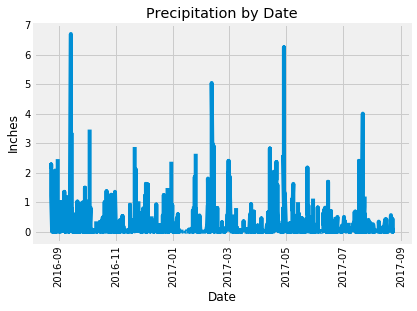

In [17]:
latest_date=dt.date(2017,8,23)
delta=dt.timedelta(days=365)
one_year=latest_date-delta
results=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>one_year).all()
rst_rows = [{"Date": result[0], "prcp": result[1]} for result in results]
df=pd.DataFrame(rst_rows)
sorted_df=df.sort_values(by=['Date'])
sorted_df['Date']=pd.to_datetime(sorted_df['Date'])
xaxis=sorted_df['Date']
yaxis=sorted_df['prcp']
plt.plot(xaxis,yaxis, label="precipitation", zorder=1)
plt.grid(True, linestyle='-')
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation = 90)
plt.show()

In [11]:
sorted_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
station=session.query(Measurement).group_by(Measurement.station,).count()
station

9

In [13]:
stat_cnt=session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).all()
stcntrows = [{"Station": result[0], "prcp_cnt": result[1]} for result in stat_cnt]
df2=pd.DataFrame(stcntrows)
df2=df2.sort_values(by=['prcp_cnt'], ascending=False)
df2

,Station,prcp_cnt
6,USC00519281,2772
1,USC00513117,2696
7,USC00519397,2685
8,USC00519523,2572
3,USC00516128,2484
2,USC00514830,1937
0,USC00511918,1932
4,USC00517948,683
5,USC00518838,342


In [19]:
mintemp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').scalar()
maxtemp=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').scalar()
avgtemp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').scalar()
print('Lowest Temp:')
print(mintemp)
print('Highest Temp:')
print(maxtemp)
print('Average Temp:')
print(avgtemp)

Lowest Temp:
54.0
Highest Temp:
85.0
Average Temp:
71.66378066378067


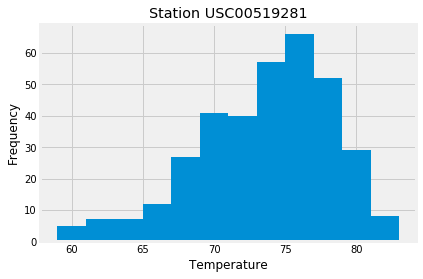

In [29]:
active=session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date>one_year).\
    filter(Measurement.station=="USC00519281").all()
active = [{"Station": result[0], "Date":result[1], "Temps": result[2]} for result in active]
dfactive=pd.DataFrame(active)
hist = dfactive.hist(bins=12)
plt.title(f"Station {active[0]['Station']}")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [16]:
# Close Session
session.close()